# Face Mask Dectector

In [1]:
import os, shutil
from pathlib import Path

In [2]:
current_dir = Path(os.getcwd()).absolute()
data_dir = current_dir.joinpath('./Data')
# with_mask_dir = data_dir.joinpath('with_mask')

In [3]:

os.listdir(data_dir)

['.DS_Store', 'with_mask', 'base_dir', 'without_mask']

In [4]:
with_mask_dir = data_dir.joinpath('with_mask')
without_mask_dir = data_dir.joinpath('without_mask')

In [5]:
print("Nunmber of with mask images: {}".format(len(os.listdir(with_mask_dir))))
print("Nunmber of without mask images: {}".format(len(os.listdir(without_mask_dir))))

Nunmber of with mask images: 10000
Nunmber of without mask images: 10000


### After downloading and uncompressing it, I will create a new dataset containing three subsets: a training set with 1,000 samples of each class, a validation set with 500 samples of each class, and a test set with 500 samples of each class.

In [6]:
base_dir = data_dir.joinpath('base_dir')

train_mask_dir = base_dir.joinpath('train_dir/with_mask')
train_without_dir = base_dir.joinpath('train_dir/without_mask')

validation_mask_dir = base_dir.joinpath('validation_dir/with_mask')
validation_without_dir = base_dir.joinpath('validation_dir/without_mask')

test_mask_dir = base_dir.joinpath('test_dir/with_mask')
test_without_dir = base_dir.joinpath('test_dir/without_mask')


In [ ]:
base_dir.mkdir(parents=True, exist_ok=True)

train_mask_dir.mkdir(parents=True, exist_ok=True)
train_without_dir.mkdir(parents=True, exist_ok=True)

validation_mask_dir.mkdir(parents=True, exist_ok=True)
validation_without_dir.mkdir(parents=True, exist_ok=True)

test_mask_dir.mkdir(parents=True, exist_ok=True)
test_without_dir.mkdir(parents=True, exist_ok=True)

In [35]:
fnames = ['with-mask-default-mask-seed{0:04}.png'.format(i) for i in range(1000)]                     
for fname in fnames:                                                       
    src = os.path.join(with_mask_dir, fname)                        
    dst = os.path.join(train_mask_dir, fname)                              
    shutil.copyfile(src, dst) 

In [36]:
fnames = ['with-mask-default-mask-seed{0:04}.png'.format(i) for i in range(1000,1500)]                     
for fname in fnames:                                                       
    src = os.path.join(with_mask_dir, fname)                        
    dst = os.path.join(validation_mask_dir, fname)                              
    shutil.copyfile(src, dst) 

In [37]:
fnames = ['with-mask-default-mask-seed{0:04}.png'.format(i) for i in range(1500,2000)]                     
for fname in fnames:                                                       
    src = os.path.join(with_mask_dir, fname)                        
    dst = os.path.join(test_mask_dir, fname)                              
    shutil.copyfile(src, dst) 

In [38]:
fnames = ['seed{0:04}.png'.format(i) for i in range(1000)]                     
for fname in fnames:                                                       
    src = os.path.join(without_mask_dir, fname)                        
    dst = os.path.join(train_without_dir, fname)                              
    shutil.copyfile(src, dst) 
    
fnames = ['seed{0:04}.png'.format(i) for i in range(1000,1500)]                     
for fname in fnames:                                                       
    src = os.path.join(without_mask_dir, fname)                        
    dst = os.path.join(validation_without_dir, fname)                              
    shutil.copyfile(src, dst) 
    
fnames = ['seed{0:04}.png'.format(i) for i in range(1500,2000)]                     
for fname in fnames:                                                       
    src = os.path.join(without_mask_dir, fname)                        
    dst = os.path.join(test_without_dir, fname)                              
    shutil.copyfile(src, dst) 

In [7]:
print("Nunmber of train mask images: {}".format(len(os.listdir(train_mask_dir))))
print("Nunmber of validation mask images: {}".format(len(os.listdir(validation_mask_dir))))
print("Nunmber of test mask images: {}".format(len(os.listdir(test_mask_dir))))
print("Nunmber of train no-mask images: {}".format(len(os.listdir(train_without_dir))))
print("Nunmber of validation no-mask images: {}".format(len(os.listdir(validation_without_dir))))
print("Nunmber of test no-mask images: {}".format(len(os.listdir(test_without_dir))))

Nunmber of train mask images: 1000
Nunmber of validation mask images: 500
Nunmber of test mask images: 500
Nunmber of train no-mask images: 1000
Nunmber of validation no-mask images: 500
Nunmber of test no-mask images: 500


### Each split contains the same number of samples from each class: this is a balanced binary-classification problem, which means classification accuracy will be an appropriate measure of success.

### Because you’re attacking a binary-classification problem, you’ll end the network with a single unit (a Dense layer of size 1) and a sigmoid activation. This unit will encode the probability that the network is looking at one class or the other

In [8]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

2021-09-23 10:19:37.560838: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)       1

In [10]:
# import tensorflow as tf
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

## Data Preprocessing

data should be formatted into appropriately preprocessed floating-point tensors before being fed into the network.
Currently, the data sits on a drive as PNG files, so the steps for getting it into the network are roughly as follows:

Read the picture files.
Decode the PNG content to RGB grids of pixels.
Convert these into floating-point tensors.
Rescale the pixel values (between 0 and 255) to the [0, 1] interval (as you know, neural networks prefer to deal with small input values).

In [11]:
train_dir = base_dir.joinpath('train_dir')
validation_dir = base_dir.joinpath('validation_dir')
test_dir = base_dir.joinpath('test_dir')

In [21]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=20,
        color_mode = "rgb",
        class_mode='binary')

Found 1000 images belonging to 2 classes.


In [22]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=20,
        color_mode = "rgb",
        class_mode='binary')

Found 2000 images belonging to 2 classes.


Note :The generator yields these batches indefinitely: it loops endlessly over the images in the target folder. For this reason, you need to break the iteration loop at some point:

In [ ]:
# pip install pillow

In [14]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('Type of data:',type(data_batch))
    print('Dimension of data:',data_batch.ndim)
    print('Data Type of data:',data_batch.dtype)
    print('labels batch shape:', labels_batch.shape)
    print('Type of labels:',type(labels_batch))
    print('Dimension of labels:',labels_batch.ndim)
    print('Data Type of labels:',labels_batch.dtype)
    break

data batch shape: (20, 224, 224, 3)
Type of data: <class 'numpy.ndarray'>
Dimension of data: 4
Data Type of data: float32
labels batch shape: (20,)
Type of labels: <class 'numpy.ndarray'>
Dimension of labels: 1
Data Type of labels: float32


Let’s fit the model to the data using the generator,using the fit_generator method, the equivalent of fit for data generators like this one.
It expects as its first argument a Python generator that will yield batches of inputs and targets indefinitely, like this one does.
Because the data is being generated endlessly, the Keras model needs to know how many samples to draw from the generator before declaring an epoch over.
This is the role of the steps_per_epoch argument: after having drawn steps_per_epoch batches from the generator—that is, after having run for steps_per_epoch gradient descent steps—the fitting process will go to the next epoch.
In this case, batches are 20 samples, so it will take 100 batches until you see your target of 2,000 samples.

When using fit_generator, you can pass a validation_data argument, much as with the fit method.
It’s important to note that this argument is allowed to be a data generator, but it could also be a tuple of Numpy arrays.
If you pass a generator as validation_data, then this generator is expected to yield batches of validation data endlessly;
thus you should also specify the validation_steps argument, which tells the process how many batches to draw from the validation generator for evaluation.
In This case, we have 500 Mask + 500 No Mask, Total of 1000 Validation samples, so we define validation_steps = 1000/20(batch size of validation_generator)

In [23]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=50)

/Users/tthekkum/Documents/LnD/ExternalGit/Projects/Face-Mask-Detector/venv/lib/python3.8/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
100/100 [==============================] - 172s 2s/step - loss: 1.6417e-09 - acc: 1.0000 - val_loss: 3.0211e-09 - val_acc: 1.0000

In [16]:
model.save('results/mask_nomask_no_aumentation.h5')

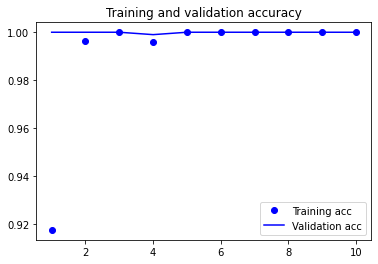

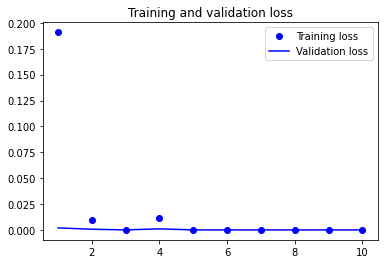

In [17]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

These graphs looks like there is overfitting.



## Using data augmentation

In [22]:
from tensorflow.keras import optimizers
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [24]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 24, 24, 128)      

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

val_datagen = ImageDataGenerator(rescale=1./255)

In [143]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        color_mode = "rgb",
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.


In [144]:
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        color_mode = "rgb",
        batch_size=20,
        class_mode='binary')

Found 1000 images belonging to 2 classes.


In [145]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=50)

/Users/tthekkum/Documents/LnD/ExternalGit/Projects/Face-Mask-Detector/venv/lib/python3.8/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
100/100 [==============================] - 183s 2s/step - loss: 0.3256 - acc: 0.8430 - val_loss: 0.0170 - val_acc: 0.9960

In [146]:
model.save('results/mask_nomask_3.h5')

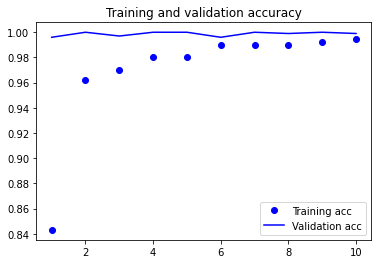

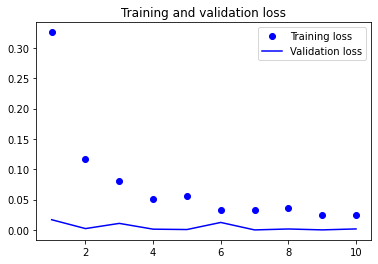

In [147]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Found 1000 images belonging to 2 classes.


### Evaluation

In [337]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(224, 224),
        color_mode = "rgb",
        batch_size=20,
        class_mode='binary')

Found 1000 images belonging to 2 classes.


In [338]:
results = model.evaluate(test_generator,steps =50, verbose=1)
print("    Loss: {:.5f}".format(results[0]))
print("Accuracy: {:.3f}%".format(results[1] * 100))
# test_generator.reset()

50/50 [==============================] - 44s 869ms/step - loss: 0.0027 - acc: 0.9990

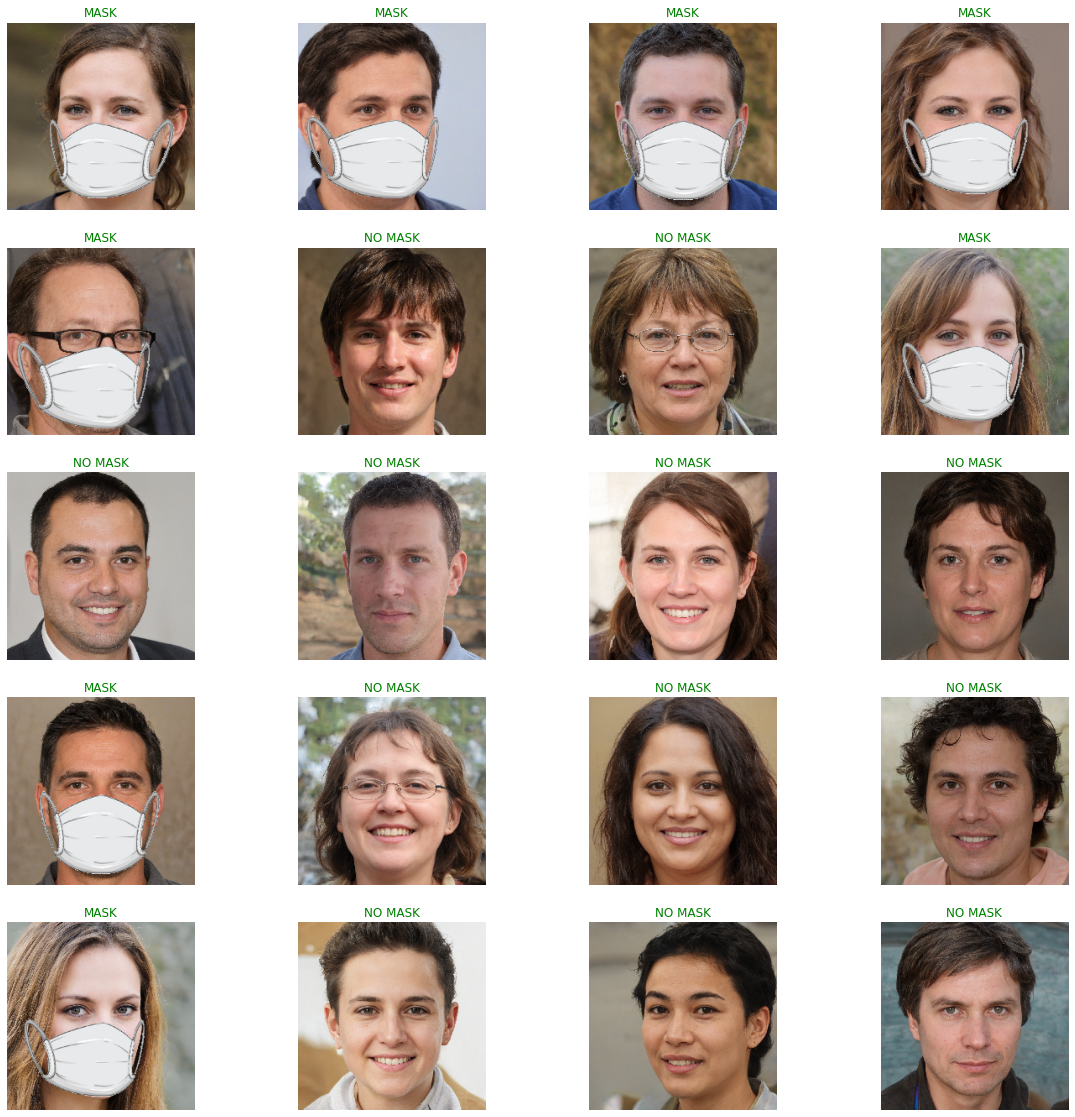

In [242]:
samples = test_generator.next()

predictions = np.squeeze(model.predict(samples[0]) >= 0.5).astype(np.int)
labels = samples[1].astype(np.int)

plt.figure(figsize=(20, 20))

for i in range(20):
    plt.subplot(5, 4, i + 1)
    plt.imshow(samples[0][i])
    plt.axis('off')
    plt.title(("NO MASK" if predictions[i] == 1 else "MASK"), color=('green' if labels[i] == predictions[i] else 'red'))

plt.show()

## Prediction

In [327]:
pred_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(224, 224),
        color_mode = "rgb",
        batch_size=20,
        class_mode='binary',
        shuffle=True,)

Found 1000 images belonging to 2 classes.


In [328]:
# pred_generator.reset()
step_size_predict=(pred_generator.n/pred_generator.batch_size)

In [329]:
y=np.concatenate([pred_generator.next()[1] for i in range(50)])

In [332]:
true_labels=y.astype(np.int)
# true_labels

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [333]:
pred=model.predict(pred_generator, steps=step_size_predict, verbose=1)

50/50 [==============================] - 44s 877ms/step

In [334]:
pred_values = np.squeeze(pred >= 0.5).astype(np.int)
# pred_values

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [335]:
print(metrics.classification_report(true_labels,pred_values))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       500
           1       1.00      1.00      1.00       500

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



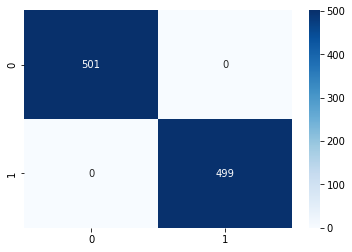

In [336]:
import sklearn.metrics as metrics
from seaborn import heatmap

confusion_matrix = metrics.confusion_matrix(y_true=pred_values,
                                            y_pred=pred_values)
heatmap(confusion_matrix, annot = True, cmap='Blues', fmt='g');

## Predicting on a new image
##
### Pre-Processing a single Image

In [345]:
# img_path = '/Users/fchollet/Downloads/cats_and_dogs_small/test/cats/cat.1700.jpg'
# img_path = with_mask_dir.joinpath('with-mask-default-mask-seed3000.png')
# img_path = without_mask_dir.joinpath('seed3000.png')
def process_single_image(img_path):
    from keras.preprocessing import image
    import numpy as np

    img = image.load_img(img_path, target_size=(224, 224))
    img_tensor = image.img_to_array(img)
    img_tensor = np.expand_dims(img_tensor, axis=0)
    img_tensor /= 255.
    # print(img_tensor.shape)
    return img_tensor

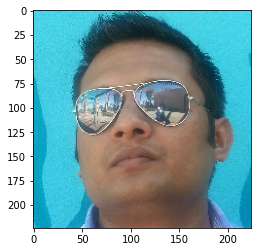

In [360]:
# img_path = without_mask_dir.joinpath('seed3000.png')
# img_path = with_mask_dir.joinpath('with-mask-default-mask-seed3000.png')
# img_path = '/Users/tthekkum/Documents/Personal/pic.jpg'
img_path = '/Users/tthekkum/Documents/Personal/my_Pic.jpg'
img_tensor = process_single_image(img_path)
# Displaying the test picture
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.show()

In [361]:
single_prediction = model.predict(img_tensor)
single_pred = np.squeeze(single_prediction >= 0.5).astype(np.int)
print("NO MASK") if single_pred == 1 else print("MASK")

NO MASK
